# Libraries

In [ ]:
#install.packages("dplyr")

In [ ]:
library(dplyr)

In [ ]:
#install.packages("tidyverse")

In [ ]:
library(tidyverse)

In [ ]:
install.packages("geosphere")

In [7]:
library(geosphere)

In [ ]:
install.packages("mice")

In [ ]:
library(mice)

In [ ]:
install.packages("caret")

In [ ]:
library(caret)

In [ ]:
install.packages("smotefamily")

In [11]:
library(smotefamily)

In [ ]:
install.packages("naivebayes")

In [ ]:
library(naivebayes)

In [ ]:
install.packages("kernlab")

In [ ]:
library(kernlab)

# Yelp Data

## Data Import

In [20]:
data <- read.csv(file="sql_6_JSON_w_zip_output.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [21]:
nrow(data)

[1] 5852

In [ ]:
head(data)

In [22]:
str(data)

'data.frame':	5852 obs. of  16 variables:
 $ business_id            : chr  "00AGVWzkxNLGb-7ZrwAOIA" "00rIcvqmfci_oJWkOqPqmg" "018ixB-WinNmflwX2UvS1g" "01mP5a06zQpaYOakfaVBOQ" ...
 $ business_lat           : chr  "39.9532594" "40.0571665" "39.9461554" "40.0727911933" ...
 $ business_long          : chr  "-75.2170205" "-75.2357367" "-75.1688026" "-75.1949470435" ...
 $ postal_code            : int  19139 19128 19103 19118 19104 19147 19103 19146 19147 19104 ...
 $ business_stars         : chr  "3.0" "4.5" "4.0" "2.5" ...
 $ business_stars_pre_2020: chr  "3.2" "4.6" "3.9" "2.5" ...
 $ review_count           : int  70 92 16 61 45 101 11 65 620 8 ...
 $ review_count_pre_2020  : chr  "75" "68" "16" "58" ...
 $ check_in_count         : chr  "73" "98" "39" "56" ...
 $ check_in_count_pre_2020: chr  "73" "89" "39" "56" ...
 $ attribute_count        : chr  "9" "8" "4" "8" ...
 $ business_park          : int  1 1 1 0 1 1 1 1 1 0 ...
 $ business_happy_h       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ busin

In [23]:
# NA values are represented in two ways: 'NULL' and 'None':

unique(data$business_price)

# To fix problem: Replace

data <- data %>%
  mutate(business_price = na_if(business_price, 'NULL')) %>%
  mutate(business_price = na_if(business_price, 'None'))

unique(data$business_price)

[1] "1"    "2"    "NULL" "3"    "4"    "None"

[1] "1" "2" NA  "3" "4"

In [24]:
data$business_id  <- as.character(data$business_id)

data$business_lat <- as.numeric(data$business_lat)

data$business_long <- as.numeric(data$business_long)

data$business_stars <- as.numeric(data$business_stars)

data$business_stars_pre_2020 <- as.numeric(data$business_stars_pre_2020) #Has NA'S

data$business_review_count <- as.integer(data$review_count)

data$review_count_pre_2020 <- as.integer(data$review_count_pre_2020) #Has NA'S

data$check_in_count <- as.integer(data$check_in_count)

data$check_in_count_pre_2020 <- as.integer(data$check_in_count_pre_2020)

data$attribute_count <- as.integer(data$attribute_count)

data$business_park <- as.factor(data$business_park)

data$business_happy_h <- as.factor(data$business_happy_h)

data$business_price <- as.integer(data$business_price)

data$business_open  <- as.factor(data$business_open)

data$n_photo <- as.integer(data$n_photo)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [25]:
summary(data)

 business_id         business_lat   business_long     postal_code   
 Length:5852        Min.   :39.87   Min.   :-75.36   Min.   :19019  
 Class :character   1st Qu.:39.95   1st Qu.:-75.18   1st Qu.:19107  
 Mode  :character   Median :39.95   Median :-75.16   Median :19124  
                    Mean   :39.97   Mean   :-75.15   Mean   :19125  
                    3rd Qu.:40.00   3rd Qu.:-75.14   3rd Qu.:19145  
                    Max.   :40.14   Max.   :-74.94   Max.   :19454  
                                                     NA's   :1      
 business_stars  business_stars_pre_2020  review_count    review_count_pre_2020
 Min.   :1.000   Min.   :1.000           Min.   :   5.0   Min.   :   1.0       
 1st Qu.:3.000   1st Qu.:3.100           1st Qu.:  14.0   1st Qu.:  12.0       
 Median :3.500   Median :3.700           Median :  38.5   Median :  36.0       
 Mean   :3.556   Mean   :3.553           Mean   : 113.8   Mean   : 108.7       
 3rd Qu.:4.000   3rd Qu.:4.100           3rd Qu.

In [26]:
sum(is.na(data$business_price))

[1] 913

# External: Population Data

## Data Import

In [27]:
population_by_zip_2010 <- read.csv(file="population_by_zip_2010.csv", header=TRUE,sep=",",dec=";")

## Cleaning & Check

In [28]:
nrow(population_by_zip_2010)

n_distinct(population_by_zip_2010$zipcode)

[1] 1622831

[1] 33119

In [29]:
#To observe structure of dataset:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population)) %>%
      slice_head(n=5)

population,minimum_age,maximum_age,gender,zipcode,geo_id
<int>,<int>,<int>,<chr>,<int>,<chr>
1560,NA,NA,,61747,8600000US61747
815,NA,NA,female,61747,8600000US61747
745,NA,NA,male,61747,8600000US61747
72,45,49,male,61747,8600000US61747
72,85,NA,female,61747,8600000US61747


In [ ]:
args(if_else)

function (condition, true, false, missing = NULL, ..., ptype = NULL, 
    size = NULL) 
NULL

In [30]:
#Replacing space ('') values with 'NULL' to be able to filter properly:

population_by_zip_2010 <- population_by_zip_2010 %>%
  mutate(gender = if_else(!gender %in% c("female", "male"), "NULL", gender))

In [31]:
# Creating the Population by Zipcode, with age subgroups:

pop_by_zip <- population_by_zip_2010 %>%
  group_by(zipcode) %>%
  summarise(
    total_population = sum(population[is.na(minimum_age) & is.na(maximum_age) & gender == "NULL"], na.rm = TRUE),
    total_population_children = sum(population[minimum_age >= 0 & maximum_age <= 14], na.rm = TRUE),
    total_population_youth = sum(population[minimum_age >= 15 & maximum_age <= 24], na.rm = TRUE),
    total_population_adults = sum(population[minimum_age >= 25 & maximum_age <= 64], na.rm = TRUE),
    total_population_seniors = sum(population[minimum_age >= 65], na.rm = TRUE)
  )

In [32]:
# Changing "zipcode" column name into "postal_code"; to match both dataset:

pop_by_zip <- pop_by_zip %>%
  rename(postal_code = zipcode)

In [33]:
# Control:

pop_by_zip %>%
  filter(postal_code == "61747")

postal_code,total_population,total_population_children,total_population_youth,total_population_adults,total_population_seniors
<int>,<int>,<int>,<int>,<int>,<int>
61747,1560,345,150,754,311


In [34]:
# To compare calculations with orginal dataset values:

population_by_zip_2010 %>%
  filter(zipcode == "61747") %>%
    arrange(desc(population)) %>%
      slice_head(n = 3)

population,minimum_age,maximum_age,gender,zipcode,geo_id
<int>,<int>,<int>,<chr>,<int>,<chr>
1560,NA,NA,NULL,61747,8600000US61747
815,NA,NA,female,61747,8600000US61747
745,NA,NA,male,61747,8600000US61747


## Left Join into Dataset

In [35]:
# Left Join into Yelp Data

data <- data %>%
            left_join(pop_by_zip, by="postal_code")

# Calculation: Nearby Businesses


## Pairwise Distance Calculation

In [ ]:
#install.packages("geosphere")

In [36]:
library(geosphere)

In [37]:
# Selecting columns for distance matrix calculation:

data_1 <- data %>%
  select(business_id, business_lat, business_long)

In [38]:
# Calculate pairwise distances for all businesses:
df_distances <- data_1 %>%
  mutate(distances = apply(data_1[, c("business_long", "business_lat")], 1, function(x) distHaversine(data_1[, c("business_long", "business_lat")], x))) %>%
    select(business_id, distances)

In [39]:
# Seting a threshold distance (in meters)
threshold_distance <- 1000

# Filtering distances to find nearby businesses
nearby_counts <- df_distances %>%
  mutate(nearby_count = rowSums(distances <= threshold_distance), nearby_count_minus_1 = nearby_count - 1) %>% #adjusting for each business counting itself (subtracting 1 from each count)
    select(business_id, nearby_count_minus_1)

# Results
head(nearby_counts)

,business_id,nearby_count_minus_1
,<chr>,<dbl>
1,00AGVWzkxNLGb-7ZrwAOIA,145
2,00rIcvqmfci_oJWkOqPqmg,11
3,018ixB-WinNmflwX2UvS1g,1016
4,01mP5a06zQpaYOakfaVBOQ,42
5,01YFYYmevGER3VJ1xFtUcA,326
6,02nb6CI8w-2EoSEkQdk2Wg,405


## Left Join into Dataset

In [40]:
#For nearby_counts, i.e. business_proximity

data <- data %>%
            left_join(nearby_counts, by="business_id")

In [ ]:
head(data)

# Base Model (without External Population Data)

## Creating a Subset

In [ ]:
#install.packages("mice")

In [42]:
library(mice)

In [43]:
# Selecting the variables for analysis:
data_to_analysis <- data %>%
    select(check_in_count_pre_2020, business_stars_pre_2020, nearby_count_minus_1, attribute_count, business_price, business_happy_h)

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
install.packages("car") #test
library(car)

In [44]:
model_pre_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
                                                   ,data_to_analysis)

In [45]:
#car::vif(m1) #test
summary(model_pre_mice)


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = data_to_analysis)

Residuals:
    Min      1Q  Median      3Q     Max 
 -844.2  -204.1   -65.3    67.4 16931.3 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -448.4666    39.8012 -11.268  < 2e-16 ***
business_stars_pre_2020            40.6767    10.0187   4.060 4.98e-05 ***
nearby_count_minus_1                0.2253     0.0188  11.985  < 2e-16 ***
attribute_count                    40.9155     2.0504  19.955  < 2e-16 ***
business_price                     49.3846    14.0270   3.521 0.000434 ***
business_happy_h1                  59.5360    76.7114   0.776 0.437727    
business_price:business_happy_h1  -34.1644    36.8424  -0.927 0.353811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 509.2 on 4751 d

In [ ]:
# (1094 observations deleted due to missingness)

## Pattern of Missings

In [ ]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,nearby_count_minus_1,business_happy_h,attribute_count,business_stars_pre_2020,check_in_count_pre_2020,business_price,
4758,1,1,1,1,1,1,0
529,1,1,1,1,1,0,1
136,1,1,1,1,0,1,1
60,1,1,1,1,0,0,2
4,1,1,1,0,1,0,2
45,1,1,1,0,0,1,2
267,1,1,1,0,0,0,3
23,1,1,0,1,1,0,2
11,1,1,0,1,0,0,3
19,1,1,0,0,0,0,4


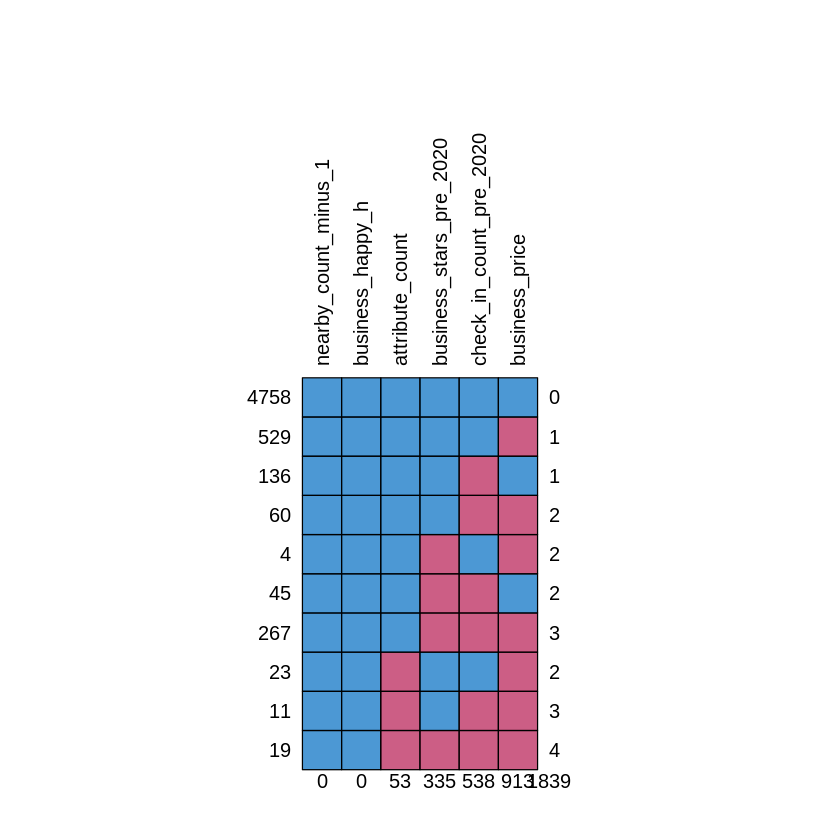

In [46]:
#inspect pattern of missings
md.pattern(data_to_analysis, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [47]:
### Impute Data via mice
MiceImputedData <- mice(data_to_analysis, m=20, maxit = 50, seed = 543, print=FALSE)

In [48]:
summary(MiceImputedData)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
check_in_count_pre_2020 business_stars_pre_2020    nearby_count_minus_1 
                  "pmm"                   "pmm"                      "" 
        attribute_count          business_price        business_happy_h 
                  "pmm"                   "pmm"                      "" 
PredictorMatrix:
                        check_in_count_pre_2020 business_stars_pre_2020
check_in_count_pre_2020                       0                       1
business_stars_pre_2020                       1                       0
nearby_count_minus_1                          1                       1
attribute_count                               1                       1
business_price                                1                       1
business_happy_h                              1                       1
                        nearby_count_minus_1 attribute_count business_price
check_in_count_pre_2020                   

## *Running the Model with Mice

### *Run with (2nd out of 20)

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData <- complete(MiceImputedData, 2)

MiceCompleteData

In [50]:
model_after_mice <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h,
                                                   MiceCompleteData)

In [51]:
summary(model_after_mice) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h, data = MiceCompleteData)

Residuals:
    Min      1Q  Median      3Q     Max 
 -914.9  -186.5   -57.1    60.2 16987.1 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -366.02761   32.36065 -11.311  < 2e-16 ***
business_stars_pre_2020            32.21230    7.96664   4.043 5.34e-05 ***
nearby_count_minus_1                0.20003    0.01576  12.692  < 2e-16 ***
attribute_count                    37.67451    1.57954  23.852  < 2e-16 ***
business_price                     39.06473   11.46949   3.406 0.000664 ***
business_happy_h1                  19.90803   65.96453   0.302 0.762816    
business_price:business_happy_h1  -10.20475   31.72690  -0.322 0.747734    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.9 o

### *Run with pooled_mice

In [52]:
#build predictive model for all generated imputed data sets
MiceAllModels <- with(MiceImputedData, lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h))

In [53]:
#combine results of all 20 models
pooled_Mice <- pool(MiceAllModels)

**Results**

In [54]:
pooled_Mice_results <- as.data.frame(summary(pooled_Mice))
pooled_Mice_results

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-359.5097538,33.06354836,-10.8732962,3084.736,4.751935e-27
business_stars_pre_2020,28.9839587,8.02467959,3.6118525,4503.185,3.073318e-04
nearby_count_minus_1,0.2000211,0.01587127,12.6027187,4853.287,7.394477e-36
attribute_count,38.0149179,1.60068127,23.7492114,4073.513,7.028045e-117
business_price,39.8226480,11.72252402,3.3971053,3781.441,6.880595e-04
business_happy_h1,35.5227463,66.34805972,0.5353999,4677.295,5.923988e-01
business_price:business_happy_h1,-20.3142282,32.08504239,-0.6331370,3426.429,5.266864e-01


In [55]:
# Adding significance level visualization to the above df:

pooled_Mice_results %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-359.5097538,33.06354836,-10.8732962,3084.736,4.751935e-27,***
business_stars_pre_2020,28.9839587,8.02467959,3.6118525,4503.185,3.073318e-04,***
nearby_count_minus_1,0.2000211,0.01587127,12.6027187,4853.287,7.394477e-36,***
attribute_count,38.0149179,1.60068127,23.7492114,4073.513,7.028045e-117,***
business_price,39.8226480,11.72252402,3.3971053,3781.441,6.880595e-04,***
business_happy_h1,35.5227463,66.34805972,0.5353999,4677.295,5.923988e-01,
business_price:business_happy_h1,-20.3142282,32.08504239,-0.6331370,3426.429,5.266864e-01,


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [56]:
# R-square for Pooled Model.

pooled_R_2 <- pool.r.squared(MiceAllModels)
pooled_R_2

,est,lo 95,hi 95,fmi
R^2,0.1725435,0.1550112,0.1906119,0.02180884


# Base Model with External Population Data

## Creating a Subset

In [ ]:
#install.packages("mice")

In [57]:
library(mice)

In [58]:
# Selecting the variables for analysis:
data_to_analysis_2 <- data %>%
    select(check_in_count_pre_2020, business_stars_pre_2020, nearby_count_minus_1, attribute_count, business_price, business_happy_h,
                        total_population, total_population_children, total_population_youth, total_population_adults) # Adding external population data variables

## *Running the Model with NA's (Pre-Mice)

In [ ]:
# Check_in_frequency = β0 + β1 * avg_number_of_stars + β2 * business_proximity + β3 * number of characteristics + β4 * (price_level x happy hour) + ε

In [ ]:
#install.packages("car") #test
library(car)

In [59]:
model_pre_mice_2 <- lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults
                                                   ,data_to_analysis_2)

In [60]:
#car::vif(m1) #test
summary(model_pre_mice_2)


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h + total_population + total_population_children + 
    total_population_youth + total_population_adults, data = data_to_analysis_2)

Residuals:
    Min      1Q  Median      3Q     Max 
 -827.8  -205.9   -63.4    70.0 16928.5 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.890e+02  4.602e+01  -8.452  < 2e-16 ***
business_stars_pre_2020           3.864e+01  1.017e+01   3.798 0.000148 ***
nearby_count_minus_1              1.831e-01  2.450e-02   7.472 9.33e-14 ***
attribute_count                   4.048e+01  2.074e+00  19.518  < 2e-16 ***
business_price                    4.792e+01  1.420e+01   3.375 0.000743 ***
business_happy_h1                 5.088e+01  7.709e+01   0.660 0.509272    
total_population                 -1.728e-02  6.771e-03  -2.552 0.010743

In [ ]:
# (1128 observations deleted due to missingness)

## Pattern of Missings

In [ ]:
args(md.pattern)

function (x, plot = TRUE, rotate.names = FALSE) 
NULL

,nearby_count_minus_1,business_happy_h,total_population,total_population_children,total_population_youth,total_population_adults,attribute_count,business_stars_pre_2020,check_in_count_pre_2020,business_price,
4724,1,1,1,1,1,1,1,1,1,1,0
527,1,1,1,1,1,1,1,1,1,0,1
125,1,1,1,1,1,1,1,1,0,1,1
60,1,1,1,1,1,1,1,1,0,0,2
4,1,1,1,1,1,1,1,0,1,0,2
45,1,1,1,1,1,1,1,0,0,1,2
267,1,1,1,1,1,1,1,0,0,0,3
23,1,1,1,1,1,1,0,1,1,0,2
11,1,1,1,1,1,1,0,1,0,0,3
19,1,1,1,1,1,1,0,0,0,0,4


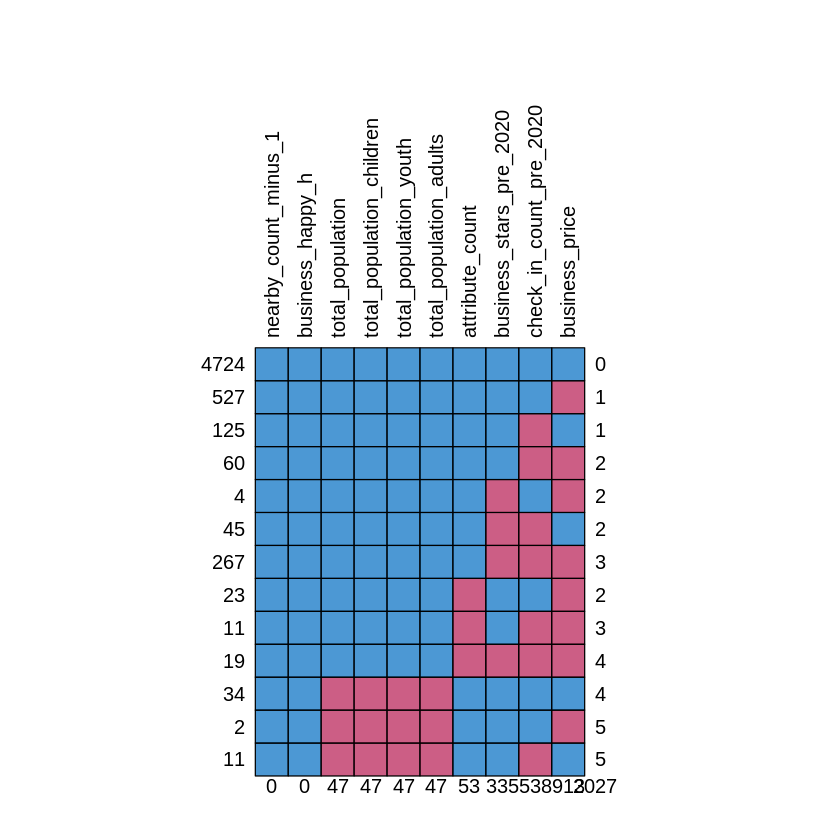

In [61]:
#inspect pattern of missings
md.pattern(data_to_analysis_2, plot = TRUE, rotate.names = TRUE)

## Impute Data via Mice

In [ ]:
args(mice)

function (data, m = 5, method = NULL, predictorMatrix, ignore = NULL, 
    where = NULL, blocks, visitSequence = NULL, formulas, blots = NULL, 
    post = NULL, defaultMethod = c("pmm", "logreg", "polyreg", 
        "polr"), maxit = 5, printFlag = TRUE, seed = NA, data.init = NULL, 
    ...) 
NULL

In [ ]:
 ## m = num. of imputations
      # Rule of thum = at least as many imputations as percentage of missing vallues
 ## maxit = max num. of iterations

In [62]:
### Impute Data via mice
MiceImputedData_2 <- mice(data_to_analysis_2, m=20, maxit = 50, seed = 5454, print=FALSE)

In [63]:
summary(MiceImputedData_2)

Class: mids
Number of multiple imputations:  20 
Imputation methods:
  check_in_count_pre_2020   business_stars_pre_2020      nearby_count_minus_1 
                    "pmm"                     "pmm"                        "" 
          attribute_count            business_price          business_happy_h 
                    "pmm"                     "pmm"                        "" 
         total_population total_population_children    total_population_youth 
                    "pmm"                     "pmm"                     "pmm" 
  total_population_adults 
                    "pmm" 
PredictorMatrix:
                        check_in_count_pre_2020 business_stars_pre_2020
check_in_count_pre_2020                       0                       1
business_stars_pre_2020                       1                       0
nearby_count_minus_1                          1                       1
attribute_count                               1                       1
business_price            

## *Running the Model with Mice

### *Run with (x.th out of 20)

In [64]:
set.seed(123)
sample(1:20, 1)

[1] 15

In [ ]:
#get complete data set (2nd out of 20)
MiceCompleteData_2 <- complete(MiceImputedData_2, 15)

MiceCompleteData_2

In [66]:
model_after_mice_2 <- lm(check_in_count_pre_2020 ~
               business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults,
                                          MiceCompleteData_2)

In [67]:
summary(model_after_mice_2) #summary(MiceAllModels$analyses[[2]])


Call:
lm(formula = check_in_count_pre_2020 ~ business_stars_pre_2020 + 
    nearby_count_minus_1 + attribute_count + business_price * 
    business_happy_h + total_population + total_population_children + 
    total_population_youth + total_population_adults, data = MiceCompleteData_2)

Residuals:
    Min      1Q  Median      3Q     Max 
 -911.7  -183.3   -55.2    64.5 16984.7 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.168e+02  3.685e+01  -8.596  < 2e-16 ***
business_stars_pre_2020           2.859e+01  7.945e+00   3.599 0.000322 ***
nearby_count_minus_1              1.685e-01  2.025e-02   8.319  < 2e-16 ***
attribute_count                   3.772e+01  1.573e+00  23.976  < 2e-16 ***
business_price                    3.914e+01  1.153e+01   3.394 0.000692 ***
business_happy_h1                 1.772e+01  6.595e+01   0.269 0.788123    
total_population                 -1.377e-02  5.568e-03  -2.473 0.013409

### *Run with pooled_mice

In [68]:
#build predictive model for all generated imputed data sets
MiceAllModels_2 <- with(MiceImputedData_2, lm(check_in_count_pre_2020 ~
              business_stars_pre_2020
              + nearby_count_minus_1
              + attribute_count
              + business_price * business_happy_h
              + total_population
              + total_population_children
              + total_population_youth
              + total_population_adults))

In [69]:
#combine results of all 20 models
pooled_Mice_2 <- pool(MiceAllModels_2)

**Results**

In [70]:
pooled_Mice_results_2 <- as.data.frame(summary(pooled_Mice_2))
pooled_Mice_results_2

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-312.45069192,37.709625153,-8.2857013,4553.415,1.528337e-16
business_stars_pre_2020,27.36391588,8.228793258,3.3253862,3268.910,8.927063e-04
nearby_count_minus_1,0.16707369,0.021245662,7.8638968,2010.654,6.023766e-15
attribute_count,37.82914845,1.609868982,23.4982777,4557.096,2.392606e-115
business_price,39.25635005,11.893930750,3.3005363,3612.262,9.743726e-04
business_happy_h1,31.43392077,67.404877321,0.4663449,3210.078,6.410003e-01
total_population,-0.01447550,0.005636226,-2.5682964,5598.844,1.024567e-02
total_population_children,0.01018738,0.005774375,1.7642399,5567.020,7.774643e-02
total_population_youth,0.01397830,0.005613700,2.4900341,5554.323,1.280210e-02


In [71]:
# Adding significance level visualization to the above df:

pooled_Mice_results_2 %>%
    mutate(sign = case_when(p.value >=0 & p.value < 0.001 ~ '***',
                              p.value >=0.001 & p.value < 0.01 ~ '**',
                                p.value >=0.01 & p.value < 0.05 ~ '*',
                                 p.value >=0.05 & p.value < 0.1 ~ '.',
                                  p.value >= 0.1 ~ ' ')
)

term,estimate,std.error,statistic,df,p.value,sign
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-312.45069192,37.709625153,-8.2857013,4553.415,1.528337e-16,***
business_stars_pre_2020,27.36391588,8.228793258,3.3253862,3268.910,8.927063e-04,***
nearby_count_minus_1,0.16707369,0.021245662,7.8638968,2010.654,6.023766e-15,***
attribute_count,37.82914845,1.609868982,23.4982777,4557.096,2.392606e-115,***
business_price,39.25635005,11.893930750,3.3005363,3612.262,9.743726e-04,***
business_happy_h1,31.43392077,67.404877321,0.4663449,3210.078,6.410003e-01,
total_population,-0.01447550,0.005636226,-2.5682964,5598.844,1.024567e-02,*
total_population_children,0.01018738,0.005774375,1.7642399,5567.020,7.774643e-02,.
total_population_youth,0.01397830,0.005613700,2.4900341,5554.323,1.280210e-02,*


In [ ]:
#   0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [72]:
# R-square for Pooled Model.

pooled_R_2_2 <- pool.r.squared(MiceAllModels_2)
pooled_R_2_2

,est,lo 95,hi 95,fmi
R^2,0.172985,0.1535576,0.1930697,0.2083983


#ML Prep.

## Data Prep.

### Binning Check_ins

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


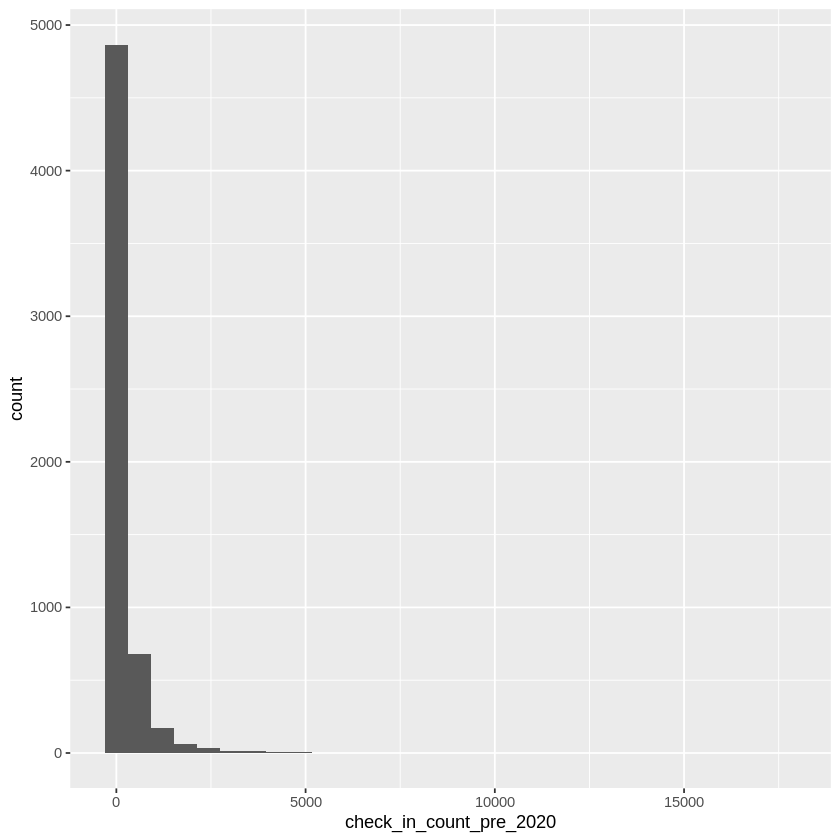

In [ ]:
ggplot(MiceCompleteData_2, aes(check_in_count_pre_2020 ))+
  geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


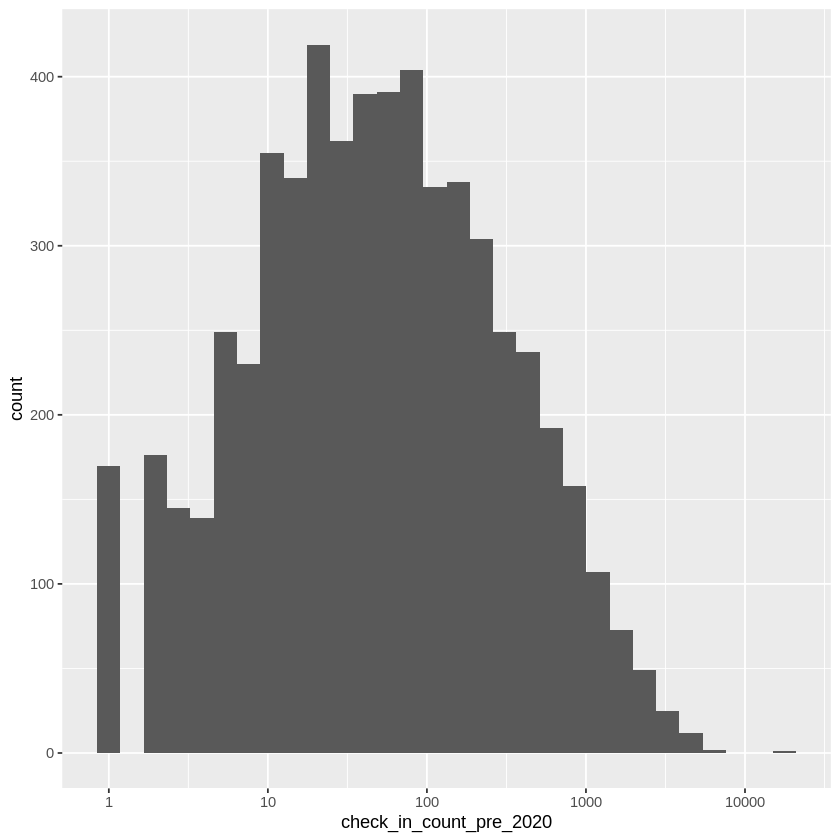

In [ ]:
ggplot(MiceCompleteData_2, aes(check_in_count_pre_2020 ))+
  geom_histogram()+
  scale_x_log10()

In [163]:
#Adding log10(check_in_count_pre_2020) to the df:

data_mice_bin_calc1 <- MiceCompleteData_2 %>%
  mutate(check_in_count_pre_2020_LOG = log10(check_in_count_pre_2020))

In [164]:
#Determine the range:
min_log <- min(data_mice_bin_calc1$check_in_count_pre_2020_LOG, na.rm = TRUE)
max_log <- max(data_mice_bin_calc1$check_in_count_pre_2020_LOG, na.rm = TRUE)

min_log
max_log

[1] 0

[1] 4.24704

In [165]:
# Number of bins:
number_of_bins <- 2

# Creating the bin edges:
breaks <- seq(min_log, max_log, length.out = number_of_bins + 1)

In [175]:
# Calculating bins, and adding into df:

data_mice_bin_calc2 <- data_mice_bin_calc1 %>%
  mutate(check_in_bin = cut(data_mice_bin_calc1$check_in_count_pre_2020_LOG, breaks = breaks, labels = FALSE, include.lowest = TRUE))

In [167]:
head(data_mice_bin_calc2)

,check_in_count_pre_2020,business_stars_pre_2020,nearby_count_minus_1,attribute_count,business_price,business_happy_h,total_population,total_population_children,total_population_youth,total_population_adults,check_in_count_pre_2020_LOG,check_in_bin
,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,73,3.2,145,9,1,0,41271,8924,6658,20247,1.863323,1
2,89,4.6,11,8,1,0,35239,4124,5312,20997,1.949390,1
3,39,3.9,1016,4,1,0,21908,971,2638,14135,1.591065,1
4,56,2.5,42,8,2,0,9808,1402,1373,5324,1.748188,1
5,53,2.6,326,9,2,0,51808,5260,25245,17786,1.724276,1
6,466,4.2,405,5,1,0,36228,4330,4679,23209,2.668386,2


In [176]:
table(data_mice_bin_calc2$check_in_bin)


   1    2 
4105 1747 

In [177]:
# Check/inspect data for renaming bins as string:

mean(data_mice_bin_calc2$check_in_count_pre_2020)

data_mice_bin_calc2 %>%
    group_by(check_in_bin) %>%
      summarize(mean = mean(check_in_count_pre_2020))

[1] 207.0996

check_in_bin,mean
<int>,<dbl>
1,34.4095
2,612.8769


In [178]:
# Renaming bins as Dummy, and adding corresponding string:

data_mice_bin_calc2$check_in_bin <- as.character(data_mice_bin_calc2$check_in_bin) #Required to be able to use recode()

data_mice_bin_calc3 <- data_mice_bin_calc2 %>%
  mutate(ch_in = recode(check_in_bin,


                               "2" = "1",
                               "1" = "0"),
        ch_in_string = recode(check_in_bin,


                               "2" = "Above_Average",
                               "1" = "Below_Average")
                               )

data_mice_bin_calc3$ch_in <- as.integer(data_mice_bin_calc3$ch_in)

data_mice_bin_calc3$ch_in_string <- as.factor(data_mice_bin_calc3$ch_in_string)


data_mice_bin_calc3$business_happy_h <- as.factor(data_mice_bin_calc3$business_happy_h)

In [179]:
data_mice_bin_calc3$ch_in_string <- relevel(data_mice_bin_calc3$ch_in_string,ref="Below_Average")

In [180]:
str(data_mice_bin_calc3)

'data.frame':	5852 obs. of  14 variables:
 $ check_in_count_pre_2020    : int  73 89 39 56 53 466 17 88 955 13 ...
 $ business_stars_pre_2020    : num  3.2 4.6 3.9 2.5 2.6 4.2 4.5 4.3 4 3.1 ...
 $ nearby_count_minus_1       : num  145 11 1016 42 326 ...
 $ attribute_count            : int  9 8 4 8 9 5 2 4 14 5 ...
 $ business_price             : int  1 1 1 2 2 1 2 1 2 2 ...
 $ business_happy_h           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ total_population           : int  41271 35239 21908 9808 51808 36228 21908 35113 36228 51808 ...
 $ total_population_children  : int  8924 4124 971 1402 5260 4330 971 5353 4330 5260 ...
 $ total_population_youth     : int  6658 5312 2638 1373 25245 4679 2638 5553 4679 25245 ...
 $ total_population_adults    : int  20247 20997 14135 5324 17786 23209 14135 20578 23209 17786 ...
 $ check_in_count_pre_2020_LOG: num  1.86 1.95 1.59 1.75 1.72 ...
 $ check_in_bin               : chr  "1" "1" "1" "1" ...
 $ ch_in                      : in

In [181]:
#Rename Dataset:

data_mice_bin <- data_mice_bin_calc3

In [182]:
table(data_mice_bin$ch_in_string)


Below_Average Above_Average 
         4105          1747 

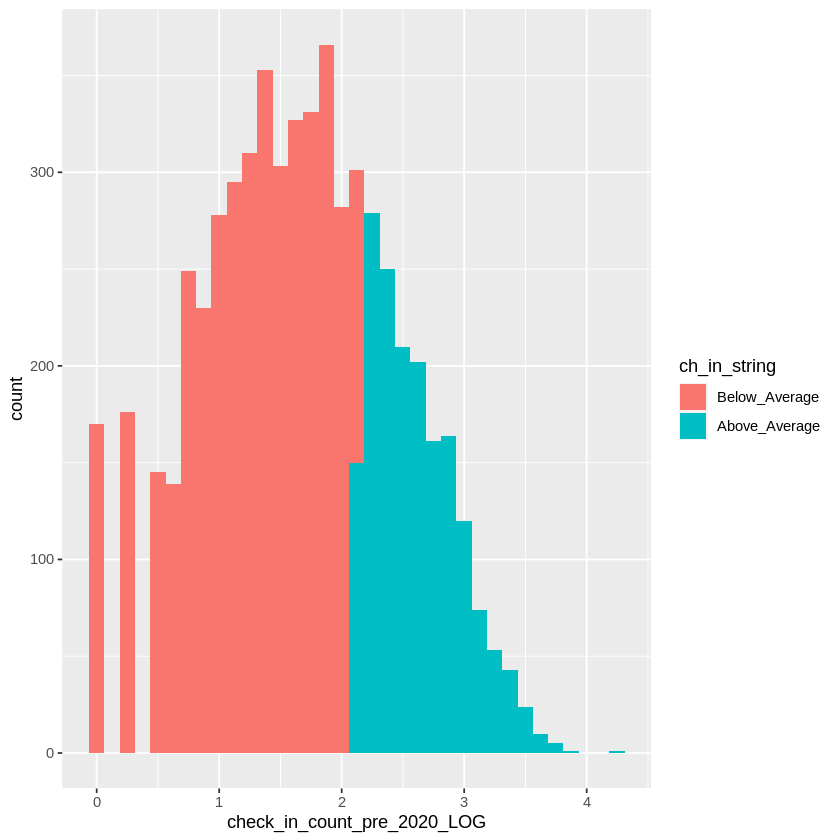

In [183]:
#Visualization of Bins:

ggplot(data_mice_bin_calc3, aes(check_in_count_pre_2020_LOG, fill = ch_in_string))+
  geom_histogram(bins=35)

### Splitting Data into Test + Evaluation Data

In [ ]:
head(data_mice_bin)

In [184]:
varsin=c("ch_in_string", "ch_in",
            "business_stars_pre_2020", "nearby_count_minus_1", "attribute_count", "business_price", "business_happy_h",
              "total_population", "total_population_children", "total_population_youth", "total_population_adults")
data_mice_bin=subset(data_mice_bin,select=varsin)

In [185]:
datasetsize <- nrow(data_mice_bin)

In [186]:
set.seed(987)

x <- data_mice_bin[sample(1:nrow(data_mice_bin), datasetsize, replace = F),]
x.train <- x[1:floor(nrow(x)*.75), ]
x.evaluate <- x[(floor(nrow(x)*.75)+1):nrow(x), ]

In [187]:
table(x.train$ch_in_string)


Below_Average Above_Average 
         3085          1304 

### Class Imbalance

#### SMOTE for Minority Class

In [ ]:
#install.packages("caret")

In [111]:
library(caret)

In [188]:
BaseFormula <- as.formula(paste0("ch_in_string~",paste(varsin[-c(1,2)],collapse = "+")))
BaseFormula1 <- as.formula(paste0("ch_in~",paste(varsin[-c(1,2)],collapse = "+")))


# create dummies (required for SMOTE)
x.traindum=cbind(x.train[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.train),newdata = x.train))
x.evaluatedum=cbind(x.evaluate[,c("ch_in","ch_in_string")],predict(dummyVars(BaseFormula1,data=x.evaluate),newdata = x.evaluate))

In [ ]:
# args(SMOTE):

# X = A data frame or matrix of numeric-attributed dataset.
# target = A vector of a target class attribute corresponding to a dataset X.
# K = The number of nearest neighbors during sampling process.
# dup_size = The number or vector representing the desired times of synthetic minority instances over the original number of majority instances.

In [191]:
# SMOTE:
set.seed(332)
x.traindum_smote <- SMOTE(x.traindum[,-c(1,2)],x.traindum[,2])$data

table(x.traindum_smote$class)


Above_Average Below_Average 
         2608          3085 

In [192]:
#Adding class factors as dummy + renaming columns:

x.traindum_smote <- x.traindum_smote %>%
                    mutate(ch_in = recode(class,


                               "Above_Average" = "1",
                               "Below_Average" = "0")
                               ) %>%
                                    rename(ch_in_string = class)

x.traindum_smote$ch_in_string <- as.factor(x.traindum_smote$ch_in_string)
x.traindum_smote$ch_in <- as.integer(x.traindum_smote$ch_in)

In [193]:
x.traindum_smote$ch_in_string <- relevel(x.traindum_smote$ch_in_string,ref="Below_Average")

In [194]:
table(x.traindum_smote$ch_in_string)


Below_Average Above_Average 
         3085          2608 

In [195]:
#Assign news train data to its original name:
x.traindum <- x.traindum_smote

#### Under-Sampling for n-1 Classes

In [ ]:
# Define the undersample function for multi-class data
undersample_data <- function(data, target) {
  # Identify the class sizes
  class_counts <- table(data[[target]])

  # Determine the size of the smallest class
  min_class_size <- min(class_counts)

  # Perform undersampling for each class
  undersampled_data <- data %>%
    group_by_at(target) %>%
    sample_n(min_class_size) %>%
    ungroup()

  return(undersampled_data)
}

In [ ]:
# Original class distribution BEFORE SMOTE:
table(x.train$ch_in_string)


Above Average Below Average 
         1329          3060 

In [ ]:
# Original class distribution after SMOTE:
table(x.traindum_smote$ch_in_string)


Above Average Below Average 
         2658          3060 

In [ ]:
# Apply undersampling
set.seed(24)
x.traindum_smote_under <- undersample_data(x.traindum_smote, "ch_in_string")

In [ ]:
# Check the new class distribution
table(x.traindum_smote_under$ch_in_string)


Above Average Below Average 
         2658          2658 

In [ ]:
#Assign news train data to its original name:
x.traindum <- x.traindum_smote_under

## Data for Heuristic Machine Learning Methods

### Normalization

In [196]:
# normalize data (very important for ML techniques, but not for logistic regression)
x.trainnorm=predict(preProcess(x.traindum, method = "range"), newdata=x.traindum)
x.evaluatenorm=predict(preProcess(x.evaluatedum, method = "range"), newdata=x.evaluatedum)

### Adjust Baseformula to the Dummy Version of the Data

In [197]:
varsin_dum = varsin[1:2]
for(i in 3:length(varsin)){
  if(!is.null(levels(x[,varsin[i]]))){
    for(j in 2:nlevels(x[,varsin[i]])){ # first level will be considered as the base-level
      varsin_dum = c(varsin_dum, paste(varsin[i], levels(x[,varsin[i]])[j], sep = "."))
    }
  } else {
    varsin_dum = c(varsin_dum, varsin[i])
  }
}

### Redo the Releveling

In [199]:
# Redo the releveling:
x.traindum$ch_in_string=relevel(x.traindum$ch_in_string,ref="Below_Average")
x.evaluatedum$ch_in_string=relevel(x.evaluatedum$ch_in_string,ref="Below_Average")
x.trainnorm$ch_in_string=relevel(x.trainnorm$ch_in_string,ref="Below_Average")
x.evaluatenorm$ch_in_string=relevel(x.evaluatenorm$ch_in_string,ref="Below_Average")

In [232]:
BaseFormula_dum <- as.formula(paste0("ch_in_string~",paste(varsin_dum[-c(1,2)],collapse = "+")))
BaseFormula1_dum <- as.formula(paste0("ch_in~",paste(varsin_dum[-c(1,2)],collapse = "+")))

### Set Threshold Probability

In [201]:
# set threshold probability: usually .5, but better is to set it to the portion of 1's.
probthres=mean(x.traindum$ch_in)

### makeLiftPlot

In [207]:
makeLiftPlot <- function(Prediction, Evaluate, ModelName){
  # plots the liftplot, and computes the GINI coefficient.
  iPredictionsSorted <- sort(Prediction,index.return=T,decreasing=T)[2]$ix #extract the index order according to predicted retention
  CustomersSorted <- Evaluate$ch_in_string[iPredictionsSorted] #sort the true behavior of customers according to predictions
  SumChurnReal<- sum(Evaluate$ch_in_string == "Above_Average") #total number of real churners in the evaluation set
  CustomerCumulative=seq(nrow(Evaluate))/nrow(Evaluate) #cumulative fraction of customers
  ChurnCumulative=apply(matrix(CustomersSorted=="Above_Average"),2,cumsum)/SumChurnReal #cumulative fraction of churners
  ProbTD = sum(CustomersSorted[1:floor(nrow(Evaluate)*.1)]=="Above_Average")/floor(nrow(Evaluate)*.1) #probability of churn in 1st decile
  ProbOverall = SumChurnReal / nrow(Evaluate) #overall churn probability
  TDL = ProbTD / ProbOverall
  GINI = sum((ChurnCumulative-CustomerCumulative)/(t(matrix(1,1,nrow(Evaluate))-CustomerCumulative)),na.rm=T)/nrow(Evaluate)
  plot(CustomerCumulative,ChurnCumulative,type="l",main=paste("Lift curve of", ModelName),xlab="Cumulative fraction of check-ins (sorted by predicted check-in probability)",ylab="Cumulative fraction of check-ins")
  lines(c(0,1),c(0,1),col="blue",type="l",pch=22, lty=2)
  legend(.66,.2,c("According to model","Random selection"),cex=0.8,  col=c("black","blue"), lty=1:2)
  text(0.15,1,paste("TDL = ",round(TDL,2), "; GINI = ", round(GINI,2) ))
  return(data.frame(TDL,GINI))
}

# ML Application

## LOGIT

In [208]:
ptm <- proc.time()
x.modelLogit <- glm(BaseFormula_dum , data = x.traindum, family = "binomial") # estimating the probability of having an "Above Average" restourant.

summary(x.modelLogit)


Call:
glm(formula = BaseFormula_dum, family = "binomial", data = x.traindum)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -5.104e+00  2.478e-01 -20.600  < 2e-16 ***
business_stars_pre_2020    2.313e-01  5.304e-02   4.361 1.29e-05 ***
nearby_count_minus_1       1.012e-03  1.120e-04   9.036  < 2e-16 ***
attribute_count            3.648e-01  1.121e-02  32.547  < 2e-16 ***
business_price             1.781e-01  6.209e-02   2.869  0.00412 ** 
business_happy_h.1        -3.087e-01  1.057e-01  -2.922  0.00348 ** 
total_population          -8.883e-05  3.339e-05  -2.660  0.00780 ** 
total_population_children -3.536e-05  3.706e-05  -0.954  0.34009    
total_population_youth     1.072e-04  3.308e-05   3.240  0.00120 ** 
total_population_adults    1.288e-04  4.258e-05   3.025  0.00249 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 785

In [209]:
x.evaluate$predictionlogit <- predict(x.modelLogit, newdata=x.evaluatedum, type = "response")
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit>probthres] <- "Above_Average"
x.evaluate$predictionlogitclass[x.evaluate$predictionlogit<=probthres] <- "Below_Average"

In [210]:
x.evaluate$correctlogit <- x.evaluate$predictionlogitclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctlogit)))

[1] "% of predicted classifications correct 0.786056049213944"


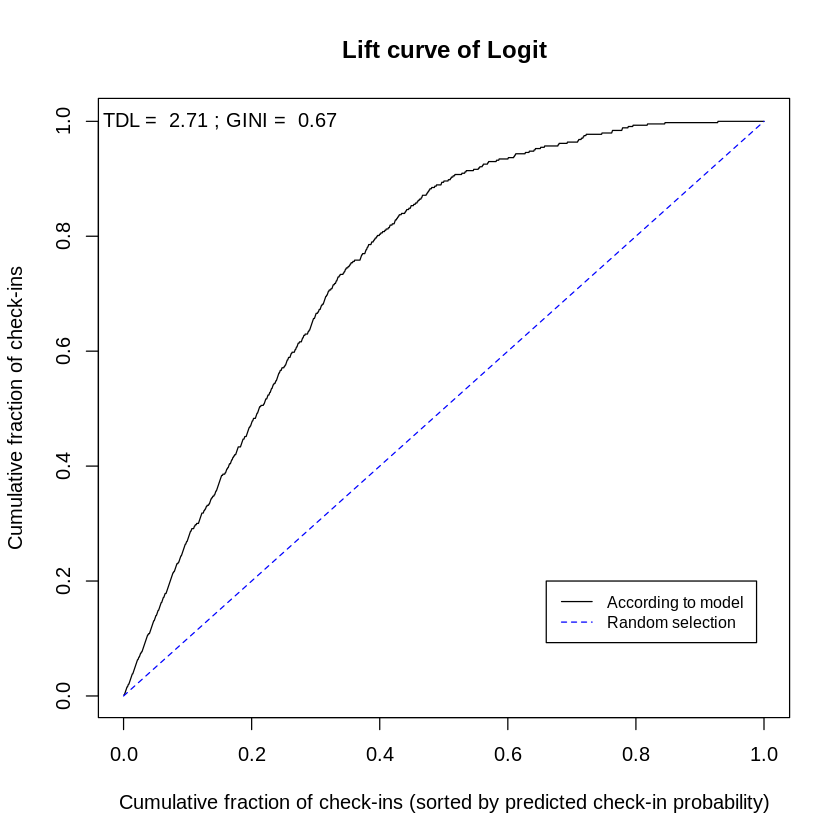

In [211]:
LogitOutput <- makeLiftPlot(x.evaluate$predictionlogit,x.evaluate,"Logit")

In [212]:
TimeAux <- proc.time() - ptm
#LogitOutput$summary=summary(x.modelLogit)
LogitOutput$TimeElapsed <- TimeAux[3]
LogitOutput$PercCorrect <- mean(x.evaluate$correctlogit)*100
Logitconfmatrix <- table(x.evaluate$predictionlogitclass,x.evaluate$ch_in_string)
rm(TimeAux)

In [213]:
LogitOutput$TimeElapsed

[1] 10.62

In [214]:
LogitOutput$PercCorrect

[1] 78.6056

In [215]:
Logitconfmatrix

               
                Below_Average Above_Average
  Above_Average           221           351
  Below_Average           799            92

## Naive Bayes

In [217]:
x.modelNB <- train(BaseFormula_dum, data = x.trainnorm, method="naive_bayes")

x.evaluate$predictionNB <- predict(x.modelNB, newdata=x.evaluatenorm,type="prob")

x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'Above_Average']>probthres]="Above_Average"
x.evaluate$predictionNBclass[x.evaluate$predictionNB[,'Above_Average']<=probthres]="Below_Average"

[1] "% of predicted classifications correct 0.74025974025974"
ROC curve variable importance

                          Importance
attribute_count              100.000
nearby_count_minus_1          42.230
total_population_children     32.030
business_happy_h.1            22.803
business_price                19.101
total_population              15.159
total_population_youth        11.867
total_population_adults        8.976
business_stars_pre_2020        0.000


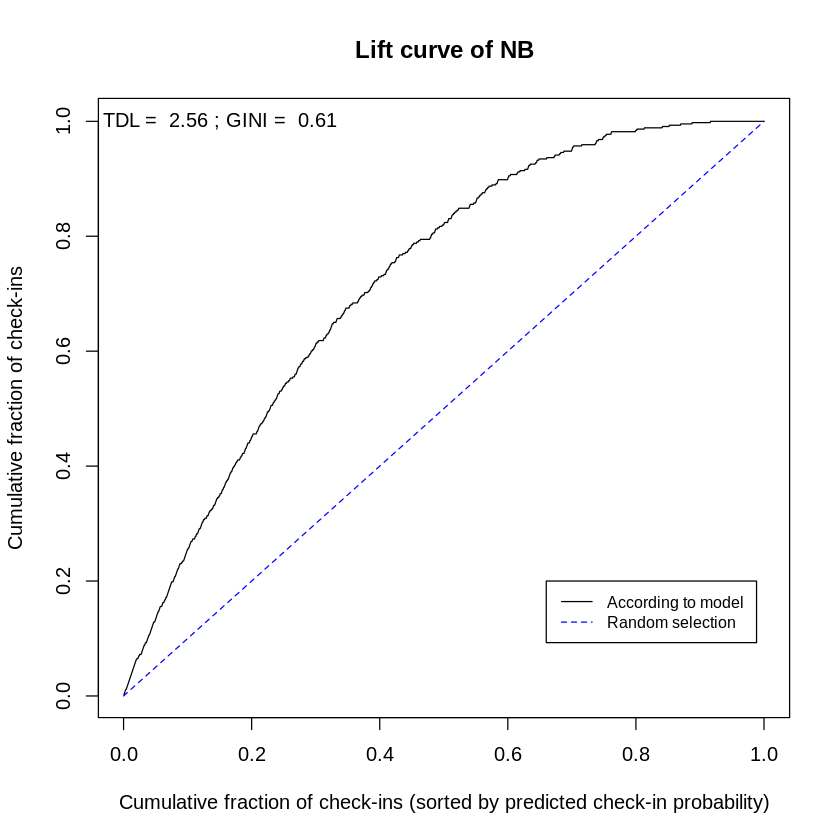

In [219]:
x.evaluate$correctNB <- x.evaluate$predictionNBclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNB)))

# the variable importance
print(varImp(x.modelNB))

# Extract the class probabilities.
x.evaluate$predictionNB <- x.evaluate$predictionNB[,'Above_Average']

NBOutput <- makeLiftPlot(x.evaluate$predictionNB,x.evaluate,"NB")

TimeAux <- proc.time() - ptm
NBOutput$TimeElapsed <- TimeAux[3]
NBOutput$PercCorrect <- mean(x.evaluate$correctNB)*100
NBconfmatrix <- table(x.evaluate$predictionNBclass,x.evaluate$ch_in_string)

In [220]:
NBOutput$PercCorrect

[1] 74.02597

In [221]:
NBconfmatrix

               
                Below_Average Above_Average
  Above_Average           260           323
  Below_Average           760           120

## KNN

[1] "% of predicted classifications correct 0.769651401230349"
ROC curve variable importance

                          Importance
attribute_count              100.000
nearby_count_minus_1          42.230
total_population_children     32.030
business_happy_h.1            22.803
business_price                19.101
total_population              15.159
total_population_youth        11.867
total_population_adults        8.976
business_stars_pre_2020        0.000


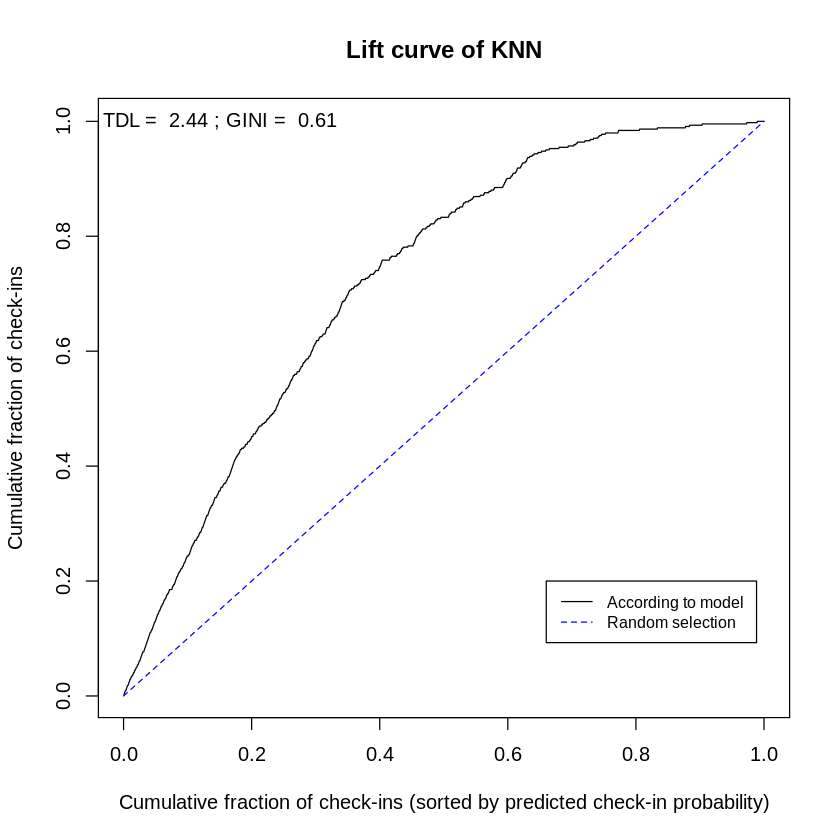

In [222]:
x.modelKNN <- train(BaseFormula_dum, data = x.trainnorm, method="knn")

x.evaluate$predictionKNN <- predict(x.modelKNN, newdata=x.evaluatenorm,type="prob")


x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'Above_Average']>probthres]="Above_Average"
x.evaluate$predictionKNNclass[x.evaluate$predictionKNN[,'Above_Average']<=probthres]="Below_Average"

x.evaluate$correctKNN <- x.evaluate$predictionKNNclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctKNN)))

# the variable importance
print(varImp(x.modelKNN))

# Extract the class probabilities.
x.evaluate$predictionKNN <- x.evaluate$predictionKNN[,'Above_Average']

KNNOutput <- makeLiftPlot(x.evaluate$predictionKNN,x.evaluate,"KNN")

TimeAux <- proc.time() - ptm
KNNOutput$TimeElapsed <- TimeAux[3]
KNNOutput$PercCorrect <- mean(x.evaluate$correctKNN)*100
KNNconfmatrix <- table(x.evaluate$predictionKNNclass,x.evaluate$ch_in_string)
rm(TimeAux)

## SVM

[1] "% of predicted classifications correct 0.784688995215311"
ROC curve variable importance

                          Importance
attribute_count              100.000
nearby_count_minus_1          42.230
total_population_children     32.030
business_happy_h.1            22.803
business_price                19.101
total_population              15.159
total_population_youth        11.867
total_population_adults        8.976
business_stars_pre_2020        0.000


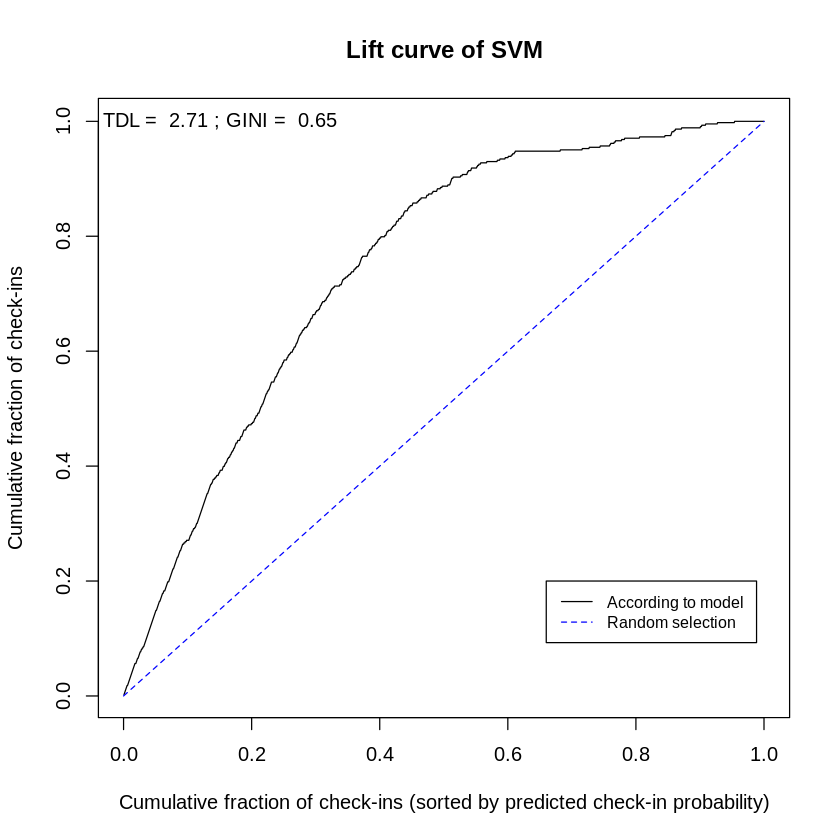

In [223]:
############ SVM

ptm <- proc.time()
# fast trainer
x.modelSVM <- train(BaseFormula_dum, data = x.trainnorm, method="svmRadial", cachesize=12000, tolerance=.01,
                    trControl = trainControl(classProbs =  TRUE))

x.evaluate$predictionSVM <- predict(x.modelSVM, newdata=x.evaluatenorm, type="prob")


x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'Above_Average']>probthres]="Above_Average"
x.evaluate$predictionSVMclass[x.evaluate$predictionSVM[,'Above_Average']<=probthres]="Below_Average"

x.evaluate$correctSVM <- x.evaluate$predictionSVMclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctSVM)))

# for fast trainer you can also get the variable importance
print(varImp(x.modelSVM))

# Extract the class probabilities.
x.evaluate$predictionSVM <- x.evaluate$predictionSVM[,'Above_Average']

SVMOutput <- makeLiftPlot(x.evaluate$predictionSVM,x.evaluate,"SVM")

TimeAux <- proc.time() - ptm
SVMOutput$TimeElapsed <- TimeAux[3]
SVMOutput$PercCorrect <- mean(x.evaluate$correctSVM)*100
SVMconfmatrix <- table(x.evaluate$predictionSVMclass,x.evaluate$ch_in_string)
rm(TimeAux)

## Neural Network

In [225]:
install.packages("NeuralNetTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [226]:
library(NeuralNetTools)

In [228]:
install.packages("RSNNS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [229]:
library(RSNNS)

Loading required package: Rcpp


Attaching package: ‘RSNNS’


The following objects are masked from ‘package:caret’:

    confusionMatrix, train




In [239]:
########## Neural network
# fast trainer using parallel computations
ptm <- proc.time()
mlp_grid = expand.grid(layer1 = 5,
                       layer2 = 0,
                       layer3 = 0)

x.modelNNet <- train(BaseFormula_dum, data=x.trainnorm, method="mlpML",tuneGrid=mlp_grid)

x.evaluate$predictionNNet <- predict(x.modelNNet, newdata = x.evaluatenorm, type="prob")

x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]>probthres]="Above_Average"
x.evaluate$predictionNNetclass[x.evaluate$predictionNNet[,"Above_Average"]<=probthres]="Below_Average"


x.evaluate$correctNNet <- x.evaluate$predictionNNetclass == x.evaluate$ch_in_string
print(paste("% of predicted classifications correct", mean(x.evaluate$correctNNet)))

print(varImp(x.modelNNet))
# plot NNet
if(0){
  NeuralNetTools::plotnet(x.modelNNet$finalModel)
}
x.evaluate$predictionNNet <- x.evaluate$predictionNNet[,"Above_Average"]

NNetOutput <- makeLiftPlot(x.evaluate$predictionNNet,x.evaluate,"Neural Network")

TimeAux <- proc.time() - ptm
#NNetOutput$summary=varImp(x.modelNNet)
NNetOutput$TimeElapsed <- TimeAux[3]
NNetOutput$PercCorrect <- mean(x.evaluate$correctNNet)*100
NNetconfmatrix <- table(x.evaluate$predictionNNetclass,x.evaluate$ch_in_string)
rm(TimeAux)

ERROR: Error in UseMethod("train"): no applicable method for 'train' applied to an object of class "formula"
